# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

# 1. First, let's modify the imports to include all necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical



# Load and preprocess the data.

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values (scale to range [0,1])
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Reshape to include channel dimension (needed for CNN)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert labels to categorical format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print('Training data shape:', X_train.shape)
print('Training labels shape:', y_train.shape)

Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)


# Create and train the CNN model

In [3]:
# Create sequential model
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer to convert 2D features to vector
    Flatten(),

    # Dense layers for classification
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Train the model.

In [4]:
# Train the model
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.8415 - loss: 0.5232 - val_accuracy: 0.9779 - val_loss: 0.0640
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9765 - loss: 0.0751 - val_accuracy: 0.9874 - val_loss: 0.0371
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9839 - loss: 0.0519 - val_accuracy: 0.9896 - val_loss: 0.0303
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9875 - loss: 0.0394 - val_accuracy: 0.9906 - val_loss: 0.0282
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9903 - loss: 0.0303 - val_accuracy: 0.9911 - val_loss: 0.0266
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9919 - loss: 0.0263 - val_accuracy: 0.9905 - val_loss: 0.0267
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9930 - loss: 0.0217 - val_accuracy: 0.9909 - val_loss: 0.0286
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9929 - loss: 0.0194 - 

# Evaluate and visualize results

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9917 - loss: 0.0306 

Test accuracy: 0.9929


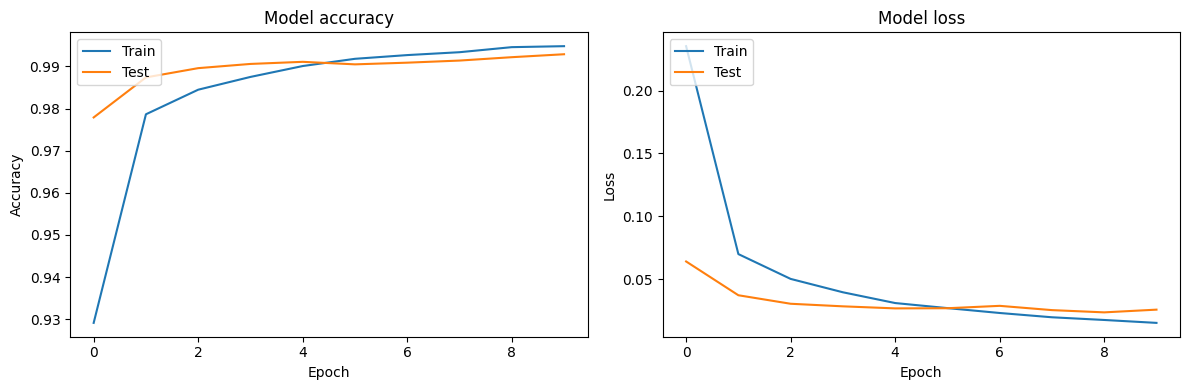

In [5]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_accuracy:.4f}')

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Add a function to test the model with random examples.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


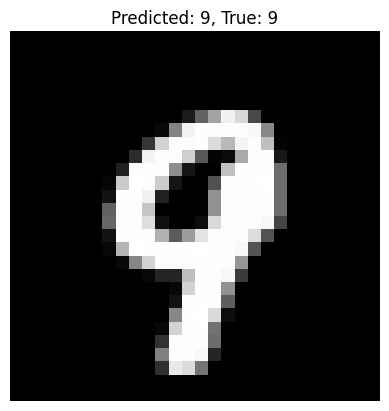

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


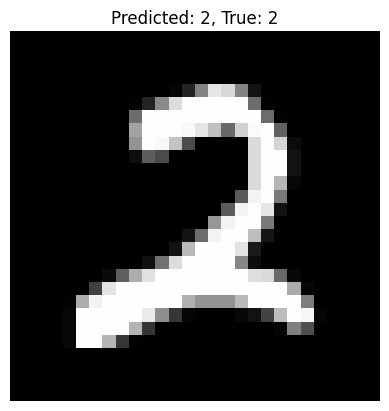

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


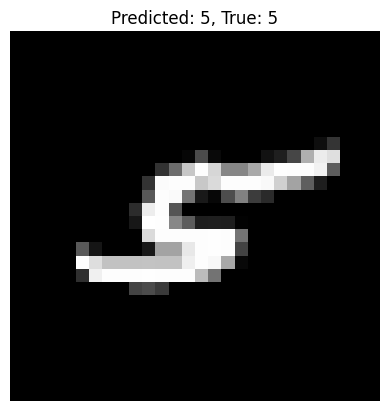

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


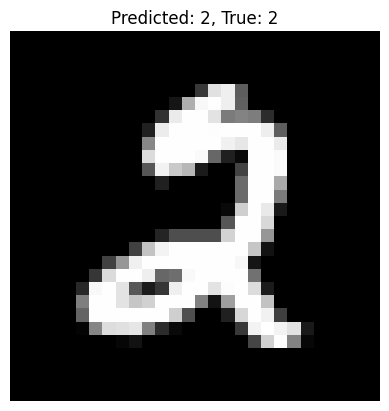

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


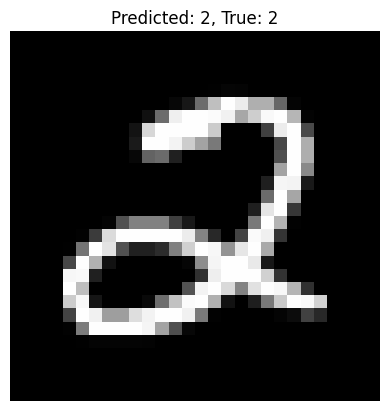

In [6]:
def show_prediction(idx):
    # Get the image and true label
    img = X_test[idx].reshape(28, 28)
    true_label = np.argmax(y_test[idx])

    # Get model prediction
    pred = model.predict(X_test[idx:idx + 1])
    pred_label = np.argmax(pred)

    # Plot the image
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted: {pred_label}, True: {true_label}')
    plt.axis('off')
    plt.show()


# Test with a few random examples
for _ in range(5):
    show_prediction(np.random.randint(0, len(X_test)))